In [2]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Downloads/sales_data (1).csv")#reading csv
df['Date'] = pd.to_datetime(df['Date'])


In [3]:
#Set Professional Theme
sns.set_style("whitegrid")
sns.set_palette("viridis")


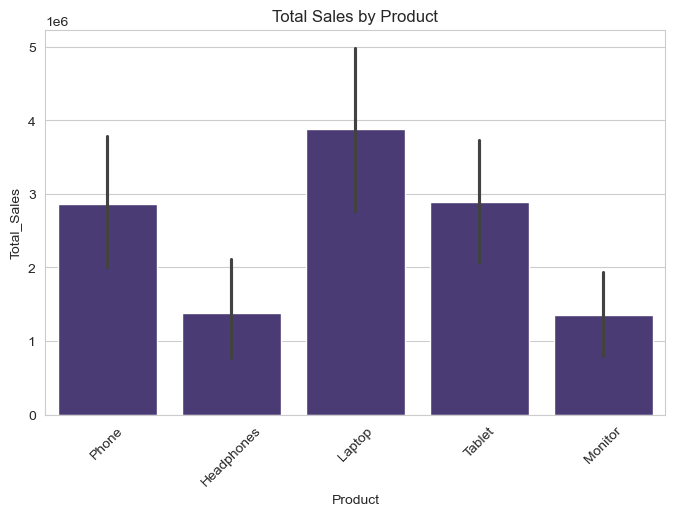

In [4]:
#Basic Plot – Sales by Product
plt.figure(figsize=(8,5))
sns.barplot(x='Product', y='Total_Sales', data=df, estimator=sum)
plt.title("Total Sales by Product")
plt.xticks(rotation=45)
plt.show()

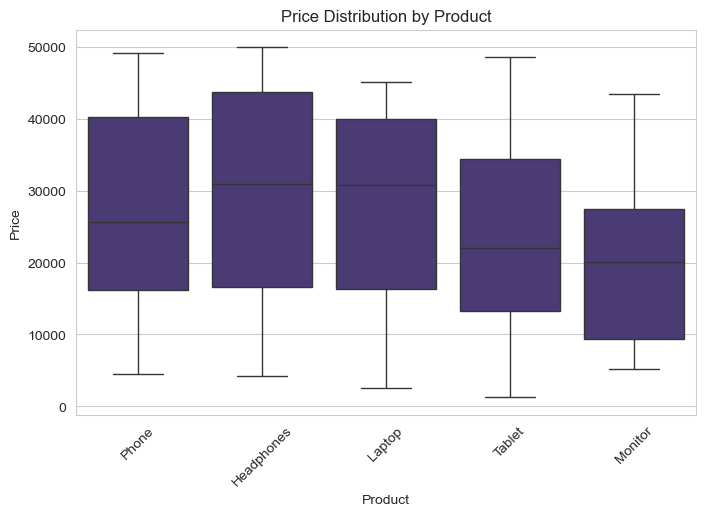

In [5]:
#Box Plot – Price Distribution by Product
plt.figure(figsize=(8,5))
sns.boxplot(x='Product', y='Price', data=df)
plt.title("Price Distribution by Product")
plt.xticks(rotation=45)
plt.show()

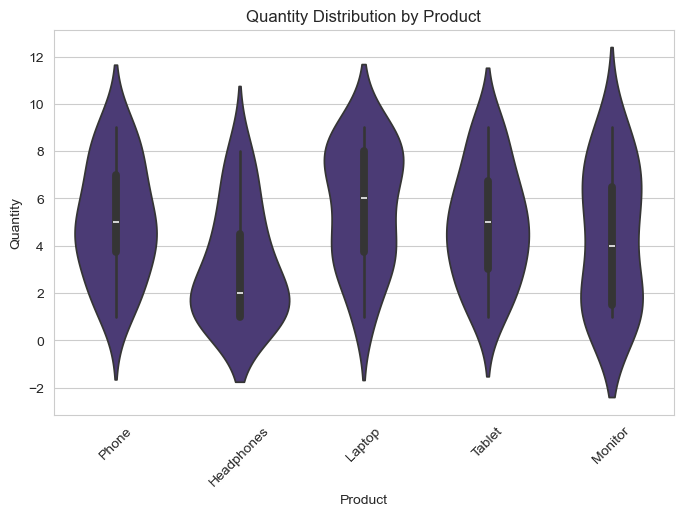

In [6]:
#Violin Plot – Quantity Distribution
plt.figure(figsize=(8,5))
sns.violinplot(x='Product', y='Quantity', data=df)
plt.title("Quantity Distribution by Product")
plt.xticks(rotation=45)
plt.show()

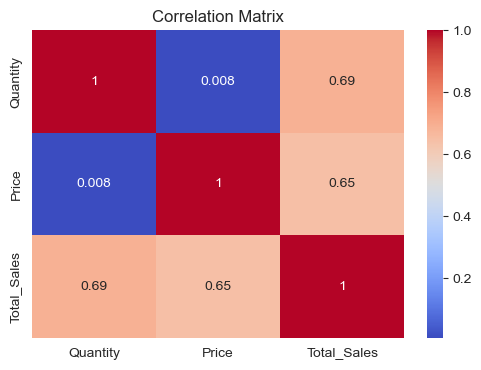

In [7]:
#Correlation Matrix
plt.figure(figsize=(6,4))
sns.heatmap(df[['Quantity','Price','Total_Sales']].corr(),
            annot=True,
            cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

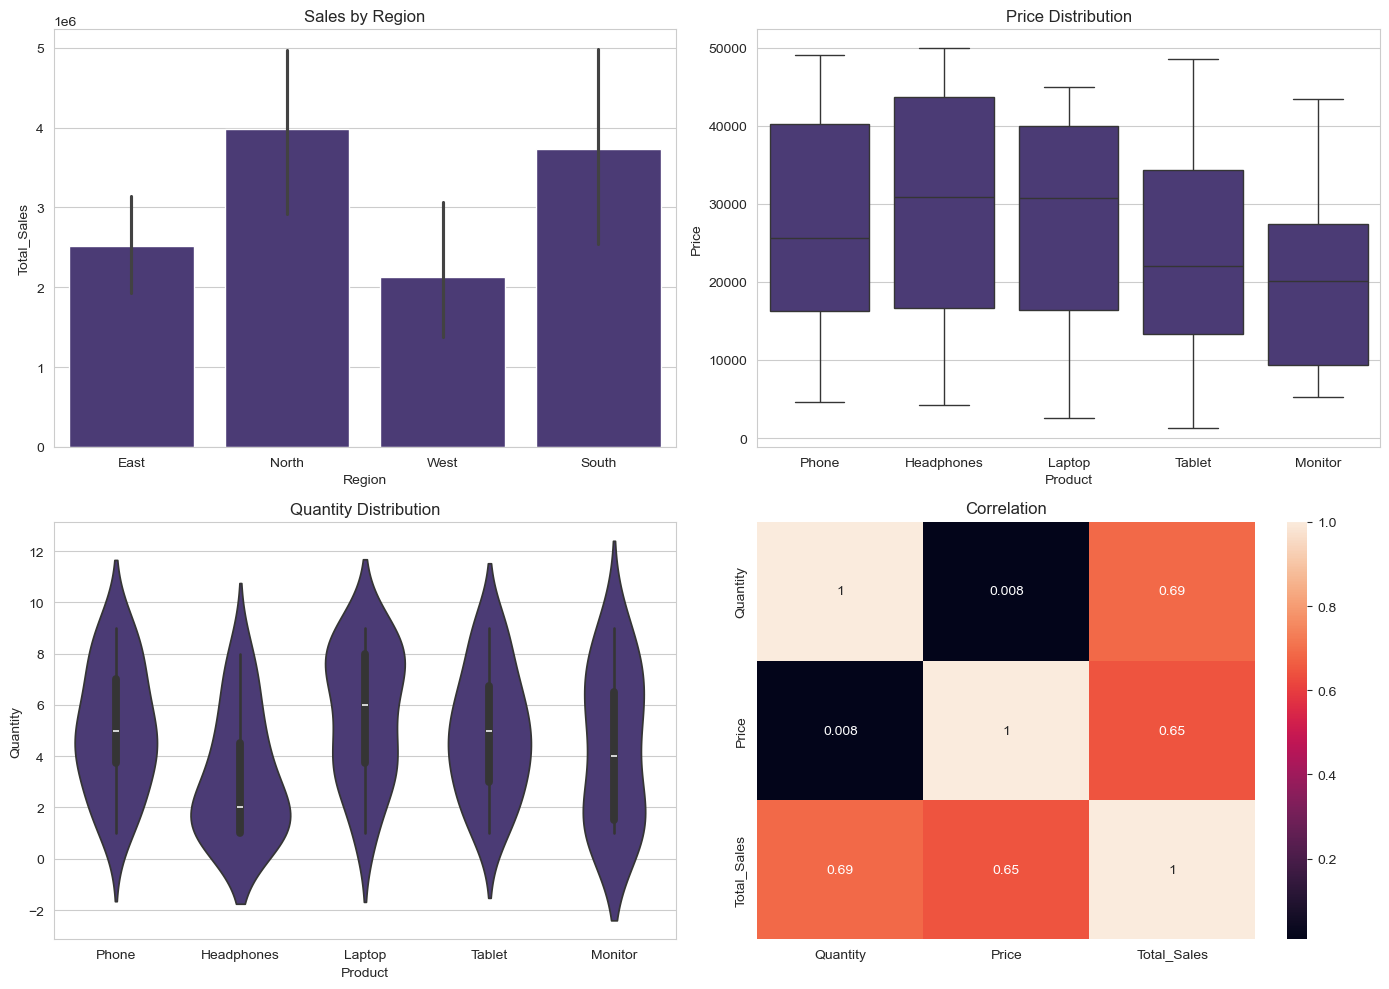

In [8]:
#Multi-Plot Dashboard (2×2 Grid)
fig, axes = plt.subplots(2, 2, figsize=(14,10))

sns.barplot(x='Region', y='Total_Sales', data=df, estimator=sum, ax=axes[0,0])
axes[0,0].set_title("Sales by Region")

sns.boxplot(x='Product', y='Price', data=df, ax=axes[0,1])
axes[0,1].set_title("Price Distribution")

sns.violinplot(x='Product', y='Quantity', data=df, ax=axes[1,0])
axes[1,0].set_title("Quantity Distribution")

sns.heatmap(df[['Quantity','Price','Total_Sales']].corr(),
            annot=True, ax=axes[1,1])
axes[1,1].set_title("Correlation")

plt.tight_layout()
plt.show()

In [9]:
#Interactive Visualizations (Plotly)

import plotly.express as px

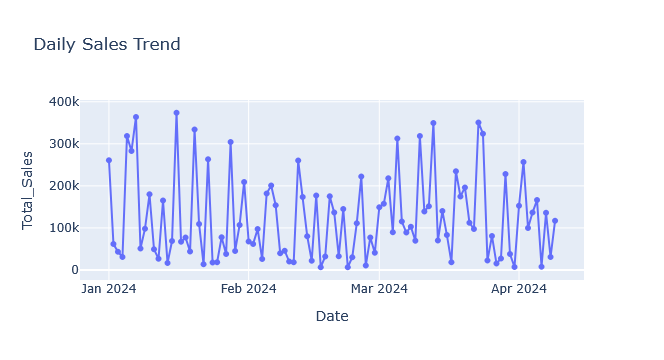

In [10]:
#Interactive Sales Trend
daily_sales = df.groupby('Date')['Total_Sales'].sum().reset_index()

fig = px.line(daily_sales,
              x='Date',
              y='Total_Sales',
              title="Daily Sales Trend",
              markers=True)
fig.show()

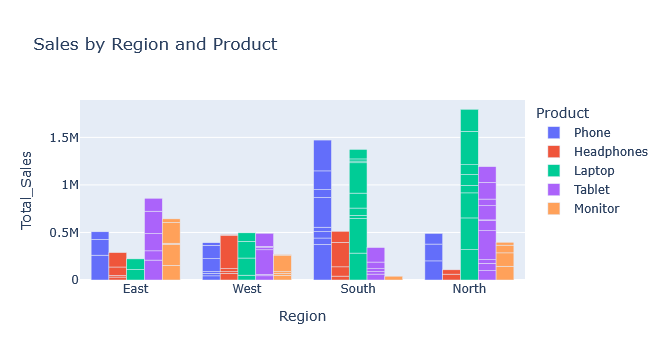

In [11]:
#Interactive Sales by Region
fig = px.bar(df,
             x='Region',
             y='Total_Sales',
             color='Product',
             title="Sales by Region and Product",
             barmode='group')
fig.show()


In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


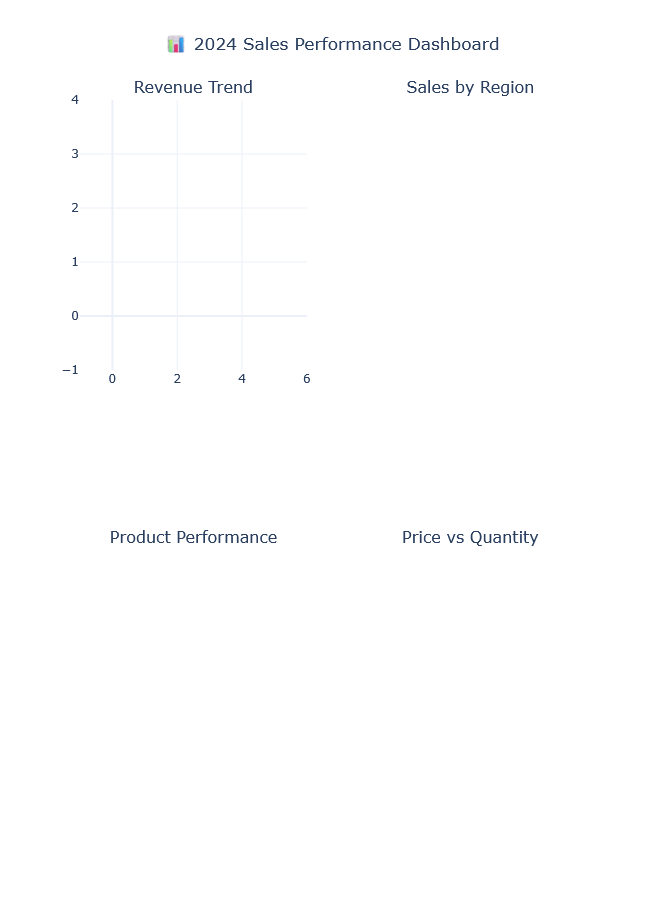

In [14]:
#Create a grid layout:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Revenue Trend",
                    "Sales by Region",
                    "Product Performance",
                    "Price vs Quantity")
)

fig.update_layout(
    template="plotly_white",
    height=900,
    width=1200,
    title_text="📊 2024 Sales Performance Dashboard",
    title_x=0.5   # Center title
)

fig.show()
